In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
df = pd.read_csv('Datasets\deptos_en_limpieza.csv')

In [12]:
reemplazos = {
    'P': 'O', 'Poniente': 'O', 'PONIENTE': 'O',
    'Norte': 'N', 'NORTE': 'N',
    'Sur': 'S', 'SUR': 'S',
    'Oriente': 'E', 'ORIENTE': 'E',
    'SP': 'SO', 'Sur-Poniente': 'SO', 'Sur-poniente': 'SO', 'SURPONIENTE': 'SO',
    'NP': 'NO', 'Nor-Poniente': 'NO', 'NorPoniente': 'NO', 'Nor-poniente': 'NO', 'NORPONIENTE': 'NO',
    'SO': 'SE', 'Sur-Oriente': 'SE', 'Sur / Oriente': 'SE', 'SURORIENTE': 'SE',
    'Nor-Oriente': 'NE', 'Nor / Oriente': 'NE', 'Nor-oriente': 'NE', 'Nor-Orienteff': 'NE', 'NORORIENTE': 'NE',
    'NorOriente-Sur': 'NSE',
    'NorOriente-Poniente': 'NEO',
    'Oriente-SurPoniente': 'SEO',
    'Nor / Oriente / Poniente': 'NEO',
    'Oriente-Poniente': 'EO', 'Oriente-poniente': 'EO',
    'Norte-sur-poniente': 'NSO',
    'Nor / Poniente / Sur': 'NSO',
    'ORI-NOR-PON-SUR': 'NSEO',
    'Todas': 'NSEO',
    'Nor / Poniente': 'NO',
    'Nor / Oriente / Poniente': 'NEO',
    'Norte-Sur': 'NS', 'Norte-sur': 'NS',
    'NorPoniente-Sur': 'NSO',          # Agregado
    'Norte-oriente-poniente': 'NEO',   # Agregado
    'Sur-oriente': 'SE',             # Agregado
    'ORI-NOR-PON': 'NEO',             # Agregado
    'NOSP': 'NSEO',
    'NSOE': 'NSEO'
}

# Primero, reemplazar los valores específicos que aún no están normalizados en 'orientacion_norm'
# Consideramos que 'NA', '-', 'No ingresada' ya fueron manejados o que orientacion_norm no los contendría,
# pero si aún los tuviera, podrías aplicar un replace inicial como en el código original:
df['orientacion_norm'] = df['orientacion_norm'].replace(['NA', '-', 'No ingresada'], np.nan)


# Aplicar los reemplazos al diccionario directamente sobre 'orientacion_norm'
df['orientacion_norm'] = df['orientacion_norm'].replace(reemplazos)

In [13]:
for letra in 'NSEO':
    df[f'Or_{letra}'] = df['orientacion_norm'].apply(lambda x: int(letra in x) if pd.notna(x) else 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26205 entries, 0 to 26204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   26205 non-null  int64  
 1   monto                26205 non-null  int64  
 2   ppm2                 26200 non-null  float64
 3   superficie_t         26205 non-null  float64
 4   superficie_u         25974 non-null  float64
 5   terraza              26205 non-null  float64
 6   dormitorios          25504 non-null  float64
 7   banos                23893 non-null  float64
 8   estacionamiento      26205 non-null  int64  
 9   bodegas              26205 non-null  int64  
 10  cantidad_pisos       16156 non-null  float64
 11  piso                 16110 non-null  float64
 12  tipo_depto           26205 non-null  object 
 13  antiguedad           26205 non-null  int64  
 14  latitud              26205 non-null  float64
 15  longitud             26205 non-null 

#### Valores faltantantes en orientacion

orientacion_norm tiene 16904 datos no nulos. A partir de estos se crearon las 4 columnas binarias para normalizar los valores de la orientacion. Falta ahora imputar los datos faltantes.
En las 4 columnas no hay valores faltantes por por defecto son 0 a menos que en orientacion_norm se haya una de las letras en NSEO.

In [10]:
df['orientacion_norm'].unique()

array(['O', 'SE', 'NSEO', 'NO', nan, 'N', 'NSE', 'S', 'SEO', 'NEO', 'NE',
       'E', 'NSO', 'EO', 'NS'], dtype=object)

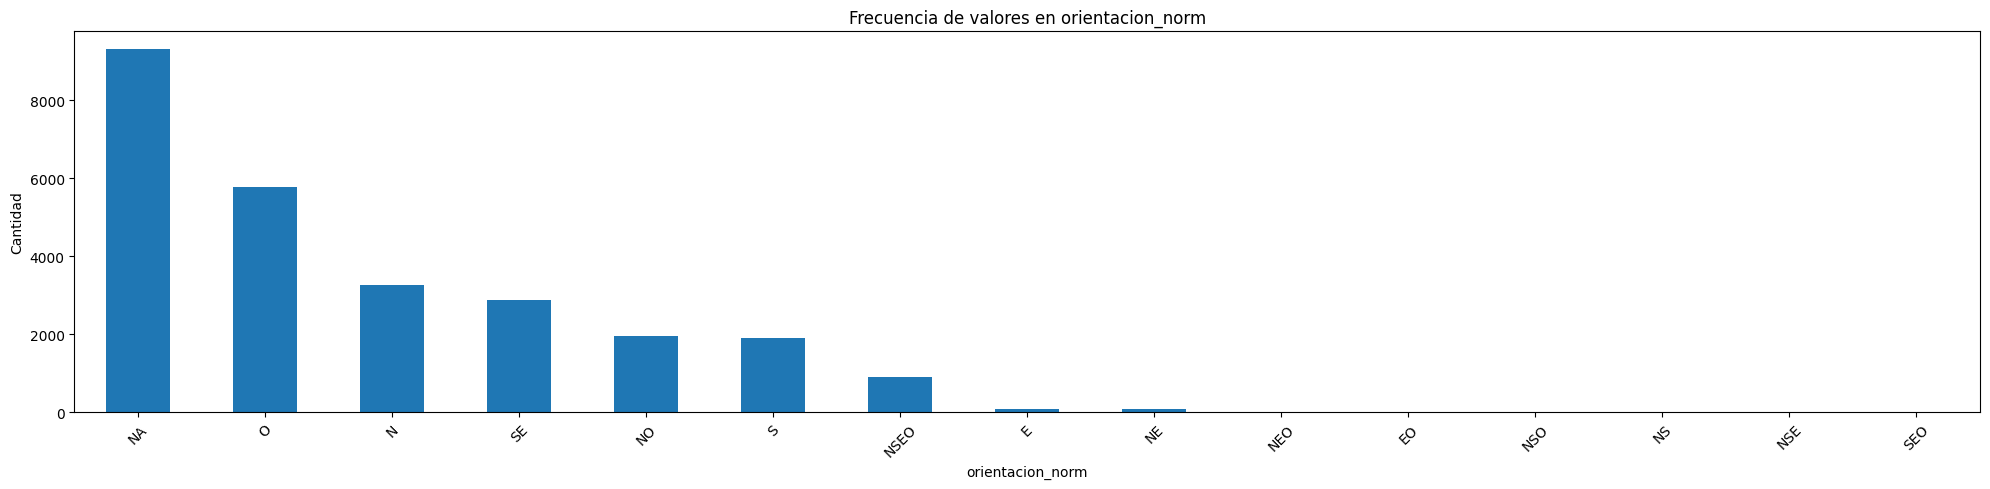

In [11]:
cols = ['orientacion_norm']

plt.figure(figsize=(20, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    
    # Convertir todos los valores a string, incluyendo pd.NA correctamente
    series_str = df[col].apply(lambda x: str(x) if pd.notna(x) else 'NA')
    value_counts = series_str.value_counts()
    
    value_counts.plot(kind='bar')
    plt.title(f'Frecuencia de valores en {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26205 entries, 0 to 26204
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   26205 non-null  int64  
 1   monto                26205 non-null  int64  
 2   ppm2                 26200 non-null  float64
 3   superficie_t         26205 non-null  float64
 4   superficie_u         25974 non-null  float64
 5   terraza              26205 non-null  float64
 6   dormitorios          25504 non-null  float64
 7   banos                23893 non-null  float64
 8   estacionamiento      26205 non-null  int64  
 9   bodegas              26205 non-null  int64  
 10  cantidad_pisos       16156 non-null  float64
 11  piso                 16110 non-null  float64
 12  tipo_depto           26205 non-null  object 
 13  antiguedad           26205 non-null  int64  
 14  latitud              26205 non-null  float64
 15  longitud             26205 non-null 

In [13]:
df['Or_Faltante'] = df['orientacion_norm'].isna().astype(int)

### Validez del Método de Imputación para la Variable 'Orientación'
Para la variable orientacion, caracterizada por su naturaleza categórica y la posibilidad de múltiples orientaciones por propiedad, se implementó una estrategia de imputación basada en la creación de columnas indicadoras binarias (flags) para cada punto cardinal (Or_N, Or_S, Or_E, Or_O). Crucialmente, para abordar los valores faltantes, se añadió una quinta flag, Or_Faltante. Este enfoque es superior a la imputación de una categoría modal o "desconocida" directa, ya que permite al modelo no solo identificar la presencia de orientaciones específicas, sino también distinguir explícitamente entre propiedades donde la orientación no fue reportada (donde todas las flags cardinales serían 0 y Or_Faltante sería 1) de aquellas que genuinamente no poseen dichas orientaciones (donde las flags cardinales serían 0 y Or_Faltante sería 0). Esta metodología garantiza la preservación de todas las observaciones y capacita al modelo para aprender si la ausencia de información sobre la orientación tiene un impacto predictivo propio en el precio del inmueble, un factor común en datasets obtenidos de fuentes con validación limitada.

In [15]:
df.to_csv('Datasets\deptos_en_limpieza.csv', index=False)

sobre tipo depto, quizas podria normalizar los valores que ya estan, 
y los faltantes remplazarlos por departamento simplemente.
De ahi pasarlos a columnas binarias tipo bandera.

Cantidad de pisos y piso de la unidad yo creo que tendre que dropearlas.
Antiguedad tengo que analizarlo. Ya elimine los valores que no hacian sentido o se expresaban como año de 
construcción. Tengo que ver que hacer con los faltantes, que son cerca de 5500.

Dropear las columas de orientacion, y otras columnas que esten resultando muy complicadas, aunque sean valiozas,
pero  considerar conservar el d ataset despues de un dropna para despues comparar.
Montar luego todo en la base de datos de grafos, y empezar a ver el embedding.


jueves 19 de junio reunion a las 10:00 am. Revision de avances

Entrega final dia viernes 27
Entregar avance y actualizacion del informe
debe capturar el trabajo del semestre
analisis exploratorio, modelos implementados, etc. 
Tambien presentacion. 


In [5]:
df_dropna = df.copy()
df_dropna = df_dropna.dropna()

In [6]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9803 entries, 0 to 26203
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                9803 non-null   int64  
 1   monto             9803 non-null   int64  
 2   ppm2              9803 non-null   float64
 3   superficie_t      9803 non-null   float64
 4   superficie_u      9803 non-null   float64
 5   terraza           9803 non-null   float64
 6   dormitorios       9803 non-null   float64
 7   banos             9803 non-null   float64
 8   estacionamiento   9803 non-null   int64  
 9   bodegas           9803 non-null   int64  
 10  cantidad_pisos    9803 non-null   float64
 11  piso              9803 non-null   float64
 12  tipo_depto        9803 non-null   object 
 13  antiguedad        9803 non-null   float64
 14  latitud           9803 non-null   float64
 15  longitud          9803 non-null   float64
 16  comuna            9803 non-null   object 
 17 

In [7]:
df_dropna.to_csv('Datasets\Dataset_sin_nan_9803.csv', index=False)